In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [2]:
def missing_values(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    
    for col in df.columns:
        missing = df[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:  
            print('created missing indicator for: {} and the missing values are : {}'.format(col,num_missing))

In [35]:
df = pd.read_csv("shair-8781-1-6-1.csv",sep = ';', skiprows=14,parse_dates=['Start'],index_col = 'Start')

In [36]:
df.describe()

,Black Carbon (410),NO2 (105),NOX as NO2 (103),O3 (109),PM10 (107),PM2.5 (102)
count,15181.000000,43430.000000,43437.000000,43666.000000,42076.000000,42875.000000
mean,0.286541,11.754000,15.068653,51.786525,12.186139,5.002183
std,0.256513,10.531848,17.426054,20.542881,8.958793,4.569415
min,0.010000,0.000000,0.600000,0.100000,-2.900000,-3.000000
25%,0.130000,4.800000,6.000000,38.400000,6.500000,2.200000
50%,0.210000,8.200000,9.900000,52.000000,10.000000,3.700000
75%,0.354000,15.000000,17.800000,65.500000,15.200000,6.300000
max,3.850000,113.500000,647.000000,151.200000,162.600000,59.300000


In [37]:
missing_values(df)

Slut - 0.0%
Black Carbon (410) - 65.0%
NO2 (105) - 1.0%
NOX as NO2 (103) - 1.0%
O3 (109) - 0.0%
PM10 (107) - 4.0%
PM2.5 (102) - 2.0%
created missing indicator for: Black Carbon (410) and the missing values are : 28643
created missing indicator for: NO2 (105) and the missing values are : 394
created missing indicator for: NOX as NO2 (103) and the missing values are : 387
created missing indicator for: O3 (109) and the missing values are : 158
created missing indicator for: PM10 (107) and the missing values are : 1748
created missing indicator for: PM2.5 (102) and the missing values are : 949


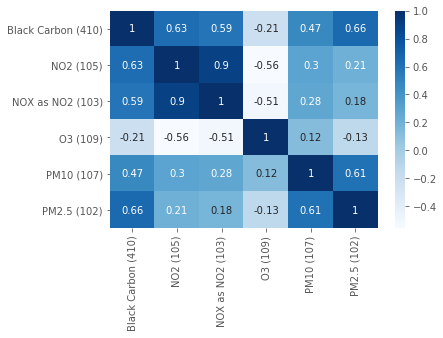

In [38]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# Adding temperature to the data

In [39]:
temp_raw = pd.read_csv("stockholmA-temp.csv",sep = ';', skiprows=9)
cols_name = ['Datum','Tid (UTC)','Lufttemperatur']
temp_raw = temp_raw[cols_name]
temp_raw.head()

/home/jude/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Datum,Tid (UTC),Lufttemperatur
0,1996-10-01,00:00:00,10.2
1,1996-10-01,01:00:00,9.7
2,1996-10-01,03:00:00,9.9
3,1996-10-01,04:00:00,9.9
4,1996-10-01,05:00:00,9.9


In [40]:
temp_raw['Date'] = temp_raw['Datum']+' '+temp_raw['Tid (UTC)']
temp_raw.head()

,Datum,Tid (UTC),Lufttemperatur,Date
0,1996-10-01,00:00:00,10.2,1996-10-01 00:00:00
1,1996-10-01,01:00:00,9.7,1996-10-01 01:00:00
2,1996-10-01,03:00:00,9.9,1996-10-01 03:00:00
3,1996-10-01,04:00:00,9.9,1996-10-01 04:00:00
4,1996-10-01,05:00:00,9.9,1996-10-01 05:00:00


In [41]:
cols = ['Date','Lufttemperatur']
temp = temp_raw[cols]
temp = temp.rename({'Date':'Datum'},axis=1)
temp = temp.set_index('Datum')
df = df.join(temp)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2014-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Slut                43824 non-null  object 
 1   Black Carbon (410)  15181 non-null  float64
 2   NO2 (105)           43430 non-null  float64
 3   NOX as NO2 (103)    43437 non-null  float64
 4   O3 (109)            43666 non-null  float64
 5   PM10 (107)          42076 non-null  float64
 6   PM2.5 (102)         42875 non-null  float64
 7   Lufttemperatur      43801 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


# Adding pressure to the data

In [42]:
pres_raw = pd.read_csv("stockholmA-pressure.csv",sep = ';', skiprows=9)
col_names = ['Datum','Tid (UTC)','Lufttryck reducerat havsytans nivå']
pres_raw = pres_raw[col_names]
pres_raw['Datum'] = pres_raw['Datum']+' '+pres_raw['Tid (UTC)']
pres_raw.head()

,Datum,Tid (UTC),Lufttryck reducerat havsytans nivå
0,2012-11-29 11:00:00,11:00:00,1006.6
1,2012-11-29 12:00:00,12:00:00,1006.2
2,2012-11-29 13:00:00,13:00:00,1005.9
3,2012-11-29 14:00:00,14:00:00,1005.7
4,2012-11-29 15:00:00,15:00:00,1005.6


In [43]:
cols = ['Datum','Lufttryck reducerat havsytans nivå']
pres = pres_raw[cols]
pres = pres.set_index('Datum')
pres = pres.rename({'Lufttryck reducerat havsytans nivå':'pressure'},axis = 1)
df = df.join(pres)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2014-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Slut                43824 non-null  object 
 1   Black Carbon (410)  15181 non-null  float64
 2   NO2 (105)           43430 non-null  float64
 3   NOX as NO2 (103)    43437 non-null  float64
 4   O3 (109)            43666 non-null  float64
 5   PM10 (107)          42076 non-null  float64
 6   PM2.5 (102)         42875 non-null  float64
 7   Lufttemperatur      43801 non-null  float64
 8   pressure            43799 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.6+ MB


# Adding relative humidity to the data

In [44]:
rh_raw = pd.read_csv('stockholmA-RH.csv', sep = ';', skiprows = 9)
rh_raw['Datum'] = rh_raw['Datum']+' '+rh_raw['Tid (UTC)']
cols = ['Datum','Relativ Luftfuktighet']
rh = rh_raw[cols]
rh.head()

/home/jude/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Datum,Relativ Luftfuktighet
0,1996-10-01 00:00:00,80
1,1996-10-01 01:00:00,83
2,1996-10-01 03:00:00,82
3,1996-10-01 04:00:00,82
4,1996-10-01 05:00:00,82


In [45]:
rh = rh.set_index('Datum')
rh = rh.rename({'Relativ Luftfuktighet':'RH'}, axis=1)
df = df.join(rh)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2014-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Slut                43824 non-null  object 
 1   Black Carbon (410)  15181 non-null  float64
 2   NO2 (105)           43430 non-null  float64
 3   NOX as NO2 (103)    43437 non-null  float64
 4   O3 (109)            43666 non-null  float64
 5   PM10 (107)          42076 non-null  float64
 6   PM2.5 (102)         42875 non-null  float64
 7   Lufttemperatur      43801 non-null  float64
 8   pressure            43799 non-null  float64
 9   RH                  43461 non-null  float64
dtypes: float64(9), object(1)
memory usage: 4.9+ MB


# Adding precepitation to the data

In [46]:
prec_raw = pd.read_csv('stockholm-precipitation.csv', sep = ';', skiprows = 9)
prec_raw['Datum'] = prec_raw['Datum']+' '+prec_raw['Tid (UTC)']
cols = ['Datum','Nederbördsmängd']
prec = prec_raw[cols]
prec = prec.set_index('Datum')
prec = prec.rename({'Nederbördsmängd':'precipitation'}, axis=1)
df = df.join(prec)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2014-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Slut                43824 non-null  object 
 1   Black Carbon (410)  15181 non-null  float64
 2   NO2 (105)           43430 non-null  float64
 3   NOX as NO2 (103)    43437 non-null  float64
 4   O3 (109)            43666 non-null  float64
 5   PM10 (107)          42076 non-null  float64
 6   PM2.5 (102)         42875 non-null  float64
 7   Lufttemperatur      43801 non-null  float64
 8   pressure            43799 non-null  float64
 9   RH                  43461 non-null  float64
 10  precipitation       43686 non-null  float64
dtypes: float64(10), object(1)
memory usage: 5.3+ MB


/home/jude/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Plots

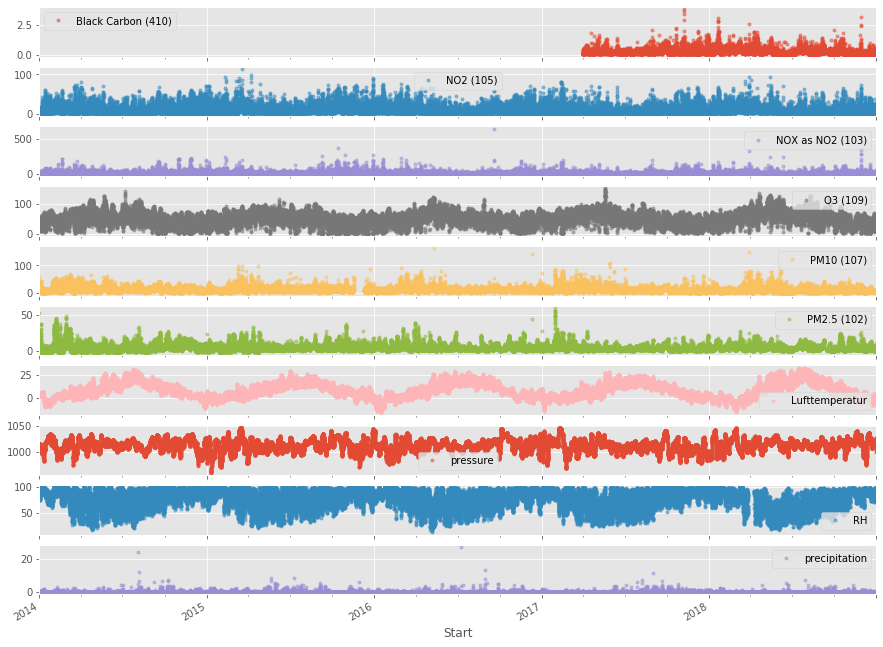

In [47]:
cols_plot = ['Black Carbon (410)','NO2 (105)','NOX as NO2 (103)','O3 (109)','PM10 (107)','PM2.5 (102)','Lufttemperatur','pressure','RH','precipitation']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 12), subplots=True)
for ax in axes:
    ax.set_ylabel('')

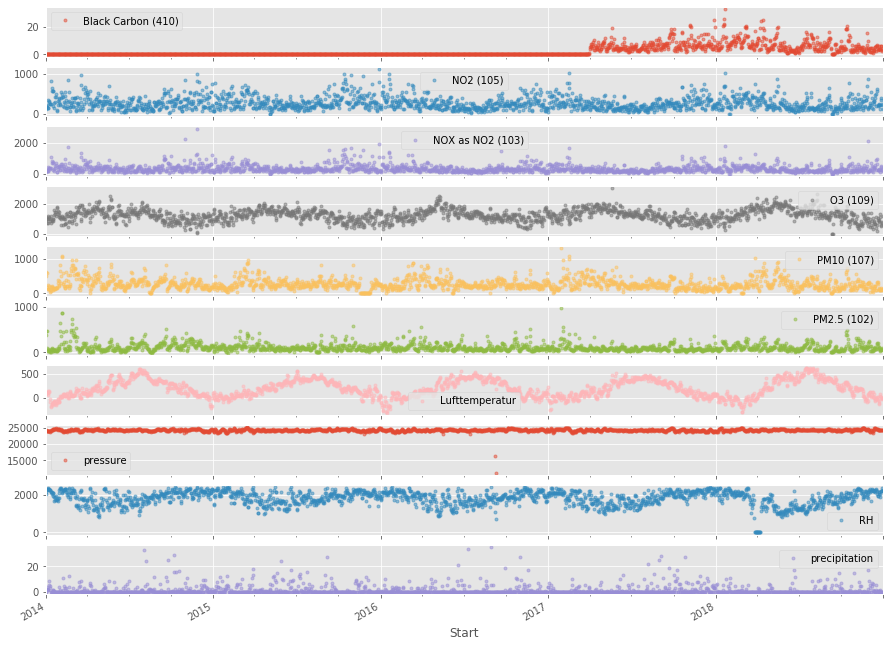

In [48]:
Daily = df.resample('D').sum()
cols_plot = ['Black Carbon (410)','NO2 (105)','NOX as NO2 (103)','O3 (109)','PM10 (107)','PM2.5 (102)','Lufttemperatur','pressure','RH','precipitation']
axes = Daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 12), subplots=True)
for ax in axes:
    ax.set_ylabel('')

## Replacing NaNs with the value from the previous row or the next row

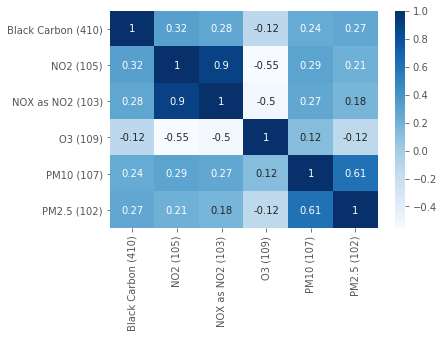

,Slut,Black Carbon (410),NO2 (105),NOX as NO2 (103),O3 (109),PM10 (107),PM2.5 (102)
Start,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.222,5.6,6.5,43.8,55.9,52.4
2014-01-01 01:00:00,2014-01-01 02:00,0.222,5.4,6.1,47.8,13.5,9.2
2014-01-01 02:00:00,2014-01-01 03:00,0.222,3.5,4.4,48.4,12.1,5.9
2014-01-01 03:00:00,2014-01-01 04:00,0.222,2.3,2.9,50.5,14.5,6.9
2014-01-01 04:00:00,2014-01-01 05:00,0.222,2.3,3.0,49.7,10.7,7.8


In [13]:
df_fillna_b = df

df_fillna_b.fillna(method = 'bfill',inplace = True)
cor = df_fillna_b.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
df_fillna_b.head()

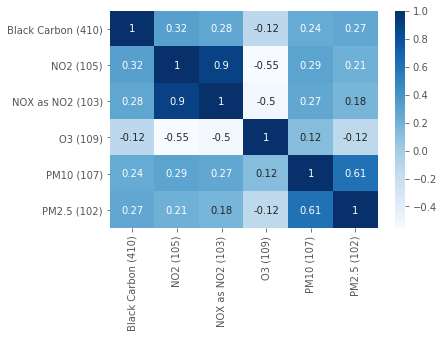

In [14]:
df_fillna_f = df
df_fillna_f.fillna(method = 'ffill', inplace = True)
cor = df_fillna_f.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
# df_fillna_b.head()


## Replacing NaNs using Median/Mean of the column

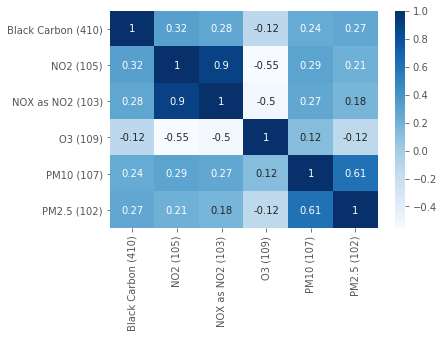

In [15]:
df_mean = df
df_mean.fillna(df_mean.mean(),inplace = True)
for col in df.columns:
    if col != 'Slut':
        df_mean[col].fillna(df_mean[col].mean(), inplace = True)

df_mean.head()
cor = df_mean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

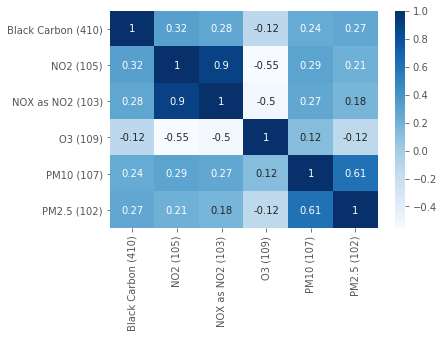

In [16]:
df_median =  df
for col in df.columns:
    if col != 'Slut':
        df_median[col].fillna(df_median[col].median(), inplace = True)
        
df_median.head()    
cor = df_median.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

## Using the interpolate method

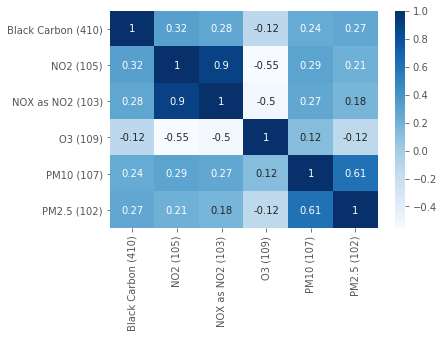

In [17]:
df_linear = df
for col in df.columns:
    if col != 'Slut':
        df_linear[col].interpolate(method='linear', direction = 'forward', inplace=True) 
        
cor = df_linear.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

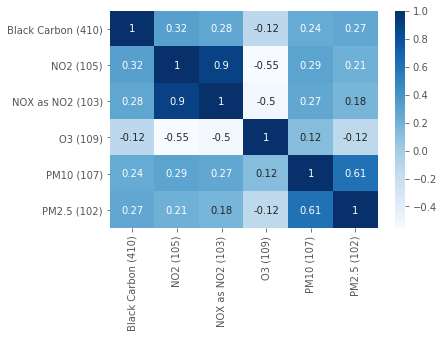

In [18]:
df_spline = df
for col in df.columns:
    if col != 'Slut':
        df_spline[col].interpolate(method='spline', order = 5, inplace=True) 
        
cor = df_spline.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

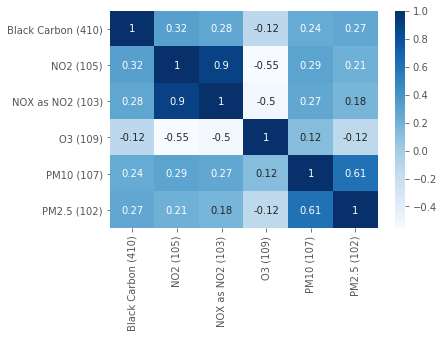

In [19]:
df_poly = df
for col in df.columns:
    if col != 'Slut':
        df_poly[col].interpolate(method='polynomial', order = 5, inplace=True) 
        
cor = df_poly.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()